<a href="https://colab.research.google.com/github/JiayiDing1/courses-introduction-to-git/blob/master/CIS9655_Project_Group_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Influences on Airbnb in NYC 
There are many factors that can influence AirBnb listings in the boroughs of NYC, such as marketing, environmental factors, rental pricing, crime rates, and user reviews.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [ ]:
airbnb = pd.read_csv('AB_NYC_2019.csv')
len(airbnb)

48895

### Marketing - YL

In [ ]:
# Importing dataset
airbnb = pd.read_csv("AB_NYC_2019.csv")
# Cleaning dataset
airbnb.drop(['id','host_name','last_review'],axis=1,inplace=True)
airbnb.fillna({'reviews_per_month':0},inplace=True)

In [ ]:
# Counting from the dataset which hosts have the most listings in NYC on AirBnB
top_host=airbnb.host_id.value_counts().head(10)
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID','host_id':'P_Count'},inplace=True)

[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

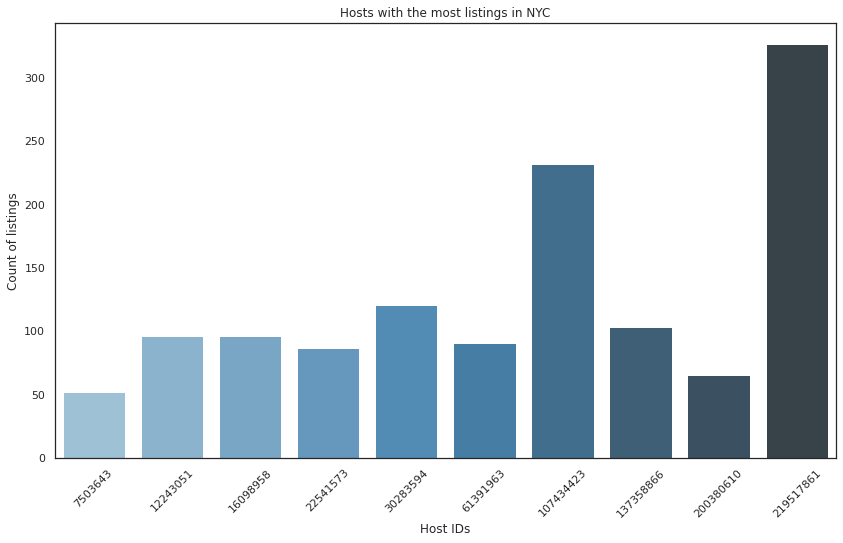

In [ ]:
# Visulizing the hosts with the most listings in NYC
sns.set(rc={'figure.figsize':(14,8)})
sns.set_style('white')
viz_1=sns.barplot(x='Host_ID',y='P_Count',data=top_host_df,palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(),rotation=45)
# This bar chart shows the top 10 Airbnb host that have the most listings in NYC. The host IDs are these host’s identity. The x-axis of the bar chart shows the top 10 hosts’ ID. The y-axis shows the number of listings. The most listing host is 219517861 which has more than 300 listings.

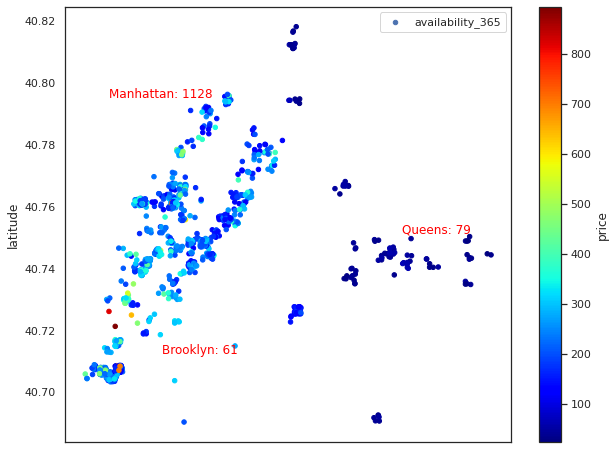

In [ ]:
# Filtering top host ID from the dataset
top_host_list=top_host_df['Host_ID'].tolist()
top_airbnb=airbnb.loc[airbnb['host_id'].isin(top_host_list)]
# Top host listing location in NYC
sub=top_airbnb[top_airbnb.price<1000]
viz_2=sub.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=1, figsize=(10,8))
viz_2.annotate("Manhattan: 1128",xy=(-74.00900,40.79500),color='red',alpha=1)
viz_2.annotate("Queens: 79",xy=(-73.90334,40.75140),color='red',alpha=1)
viz_2.annotate("Brooklyn: 61",xy=(-73.990,40.71232),color='red',alpha=1)
viz_2.legend()
#The scatter plot shows the location of the top 10 host’s listings. This map included three regions, which are Manhattan, Queens, and Brooklyn. There are 1128 listings on Manhattan, 79 listings on Queens, and 61 listings on Brooklyn. Manhattan is the mot popular and competitive place. Also, the color of the dot shows the price of a listing. For example, light blue dots are showing that the Airbnb in midtown are more than 300 dollar per night, while the dark blue ones on the east side are around 200 dollar per night.

In [ ]:
# Number that explain the graph above
top_airbnb[top_airbnb.price<1000].groupby('neighbourhood_group')['name'].count().sort_values(ascending=False)

neighbourhood_group
Manhattan    1128
Queens         79
Brooklyn       61
Name: name, dtype: int64

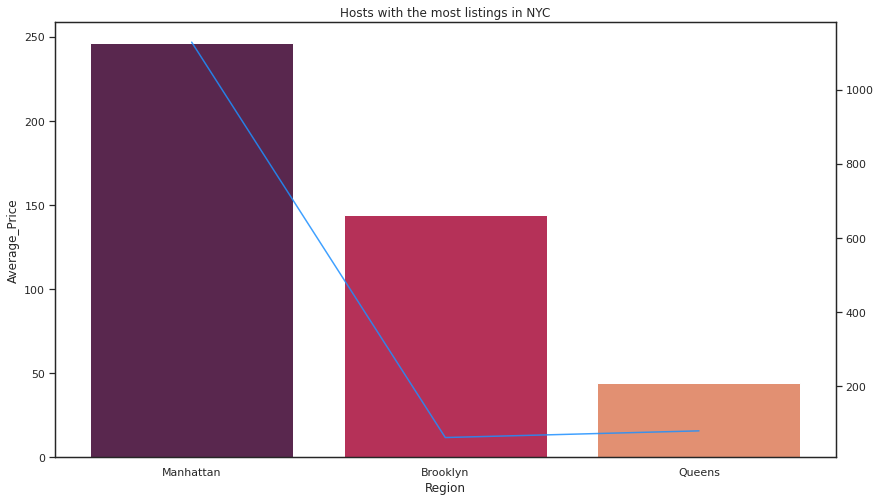

In [ ]:
# Finding top host competitive price in each region
top_host_neighbourhood_avg_price=top_airbnb.groupby('neighbourhood_group')["price"].mean().sort_values(ascending=False)
top_host_neighbourhood_avg_price
# Transforming to dataframe
neighbourhood_avg_price_frame=top_host_neighbourhood_avg_price.to_frame()
region=neighbourhood_avg_price_frame.index
region_price=neighbourhood_avg_price_frame['price']
# Visualizing top host competitive price in each region
viz_3=sns.barplot(x=neighbourhood_avg_price_frame.index,y=neighbourhood_avg_price_frame['price'],data=neighbourhood_avg_price_frame,palette='rocket')
viz_3.set_title('Hosts with the most listings in NYC')
viz_3.set_ylabel('Average_Price')
viz_3.set_xlabel('Region')
viz_3.set_xticklabels(viz_3.get_xticklabels())
viz_3_twinx=viz_3.twinx()
viz_3_twinx=sns.lineplot(x=['Manhattan','Brooklyn','Queens'],y=[1128,61,79],color="dodgerblue",alpha=0.85)
#This is a combination of bar graph and line graph. The bar graph shows the competitive price for top hosts in each borough, while the line graph shows the total number of top host listing for each borough again. It can provide a more intuitive sense between the supply and the price. It shows that Manhattan has the highest average price, Brooklyn is in the second place and Queens is in the third place. 

In [ ]:
# Using loop and function to see the top 25 most used words by host to name their listing
_names_=[]

for name in top_airbnb.name:
    _names_.append(name)

def split_name(name):
    spl=str(name).split()
    return spl
_names_for_count_=[]

for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

        
from collections import Counter

_top_25_words=Counter(_names_for_count_).most_common()
_top_25_words=_top_25_words[0:25]


words_25=pd.DataFrame(_top_25_words)
words_25.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, '|'),
 Text(0, 0, '+'),
 Text(0, 0, '1br'),
 Text(0, 0, 'sonder'),
 Text(0, 0, 'by'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'blueground'),
 Text(0, 0, 'w/'),
 Text(0, 0, 'gym'),
 Text(0, 0, 'in'),
 Text(0, 0, 'doorman'),
 Text(0, 0, 'stock'),
 Text(0, 0, 'exchange'),
 Text(0, 0, 'east'),
 Text(0, 0, 'midtown'),
 Text(0, 0, 'near'),
 Text(0, 0, 'rooftop'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'west'),
 Text(0, 0, '1'),
 Text(0, 0, '2br'),
 Text(0, 0, 'the'),
 Text(0, 0, '2'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'gym,')]

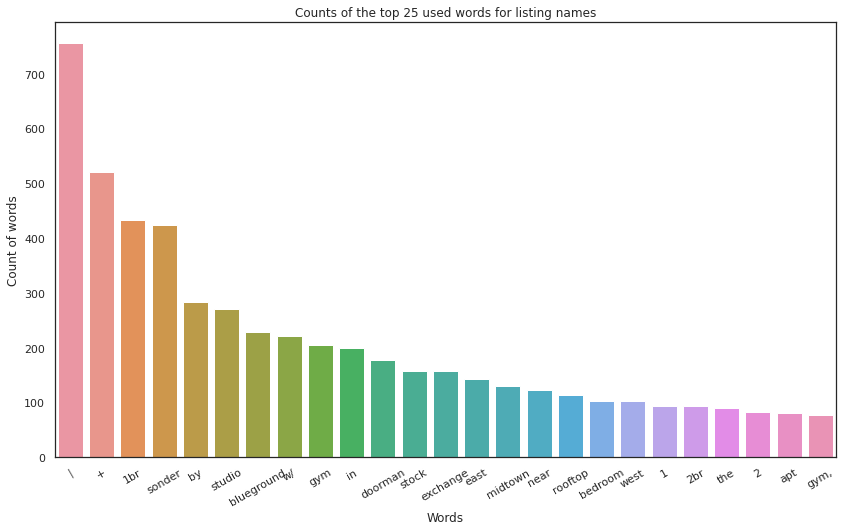

In [ ]:
# Visualizing these 25 most popular names that top host use for SEO
viz_4=sns.barplot(x='Words', y='Count', data=words_25)
viz_4.set_title('Counts of the top 25 used words for listing names')
viz_4.set_ylabel('Count of words')
viz_4.set_xlabel('Words')
viz_4.set_xticklabels(viz_4.get_xticklabels(), rotation=30)
#This bar graph shows the top 25 listing name words that top hosts used the most for their listings on the Airbnb platform. The most used word is “|” vertical bar, following that are “+”, “1br”, “sonder” etc. For example, the vertical bar appeared more than 700 times in all the listing names of these top 10 hosts.

### Room Type Distribution - JD

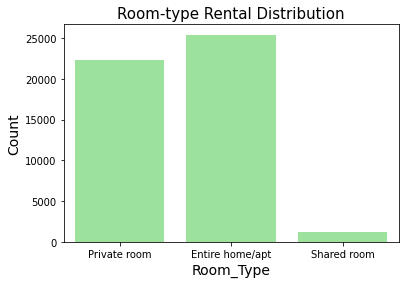

In [ ]:
# Room type rental distribution
# Most rooms listed on Airbnb are private rooms and entire home and apartments, with only very small number of shared rooms.
fig,ax = plt.subplots()
ax = sns.countplot(x=airbnb.room_type, color='lightgreen')
ax.set_xlabel("Room_Type", fontsize = '14')
ax.set_ylabel("Count", fontsize = '14')
plt.title('Room-type Rental Distribution', fontsize='15',color='k')
plt.show()

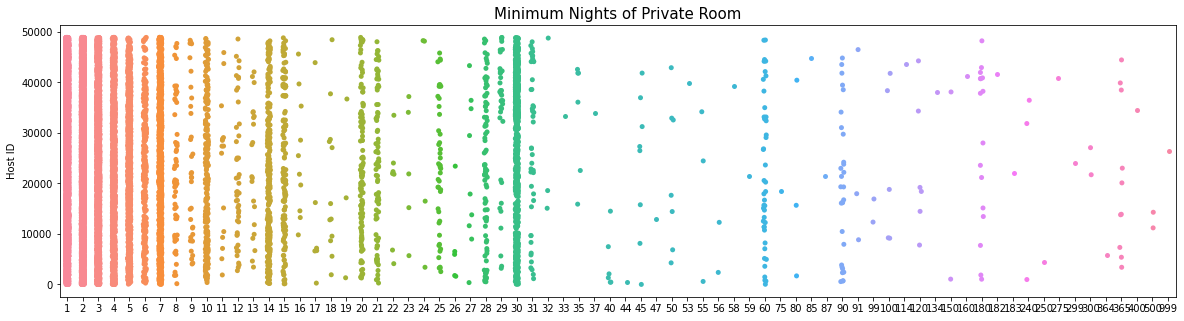

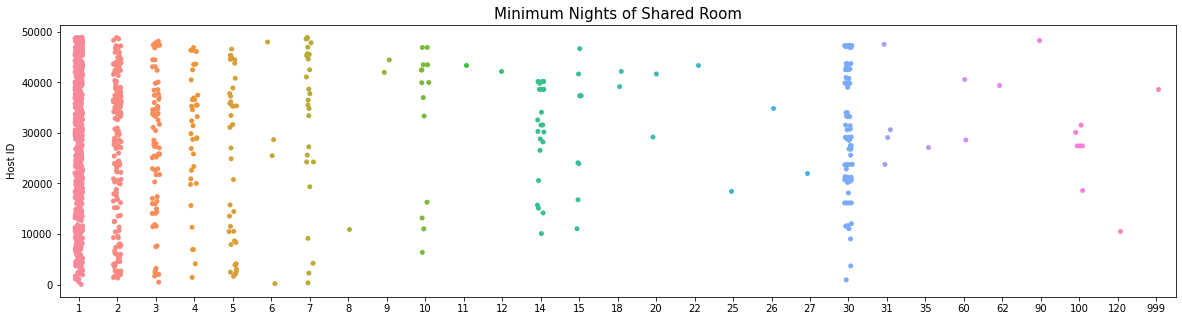

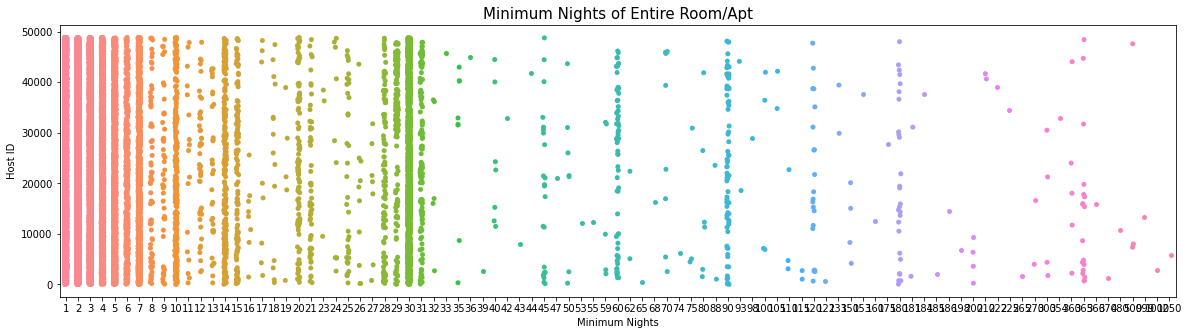

In [ ]:
# Minimum nights per reserved room
# These three graphs are nights that customer spend for each room type.
p1 = airbnb[airbnb.room_type=="Private room"]['minimum_nights']
f,ax = plt.subplots(figsize=(20,5))
ax = sns.stripplot(y= p1.index,x= p1.values)
plt.ylabel("Host ID")
plt.title("Minimum Nights of Private Room",fontsize='15')
p2 = airbnb[airbnb.room_type=="Shared room"]['minimum_nights']
f,ax = plt.subplots(figsize=(20,5))
ax = sns.stripplot(y= p2.index,x= p2.values)
plt.ylabel("Host ID")
plt.title("Minimum Nights of Shared Room",fontsize='15')
p3 = airbnb[airbnb.room_type=="Entire home/apt"]['minimum_nights']
f,ax = plt.subplots(figsize=(20,5))
ax = sns.stripplot(y= p3.index,x= p3.values)
plt.xlabel("Minimum Nights")
plt.ylabel("Host ID")
plt.title("Minimum Nights of Entire Room/Apt",fontsize='15')
plt.show()

### Neighbourhood Distribution - JD


In [ ]:
# Size of each neighbourhood groups
airbnb["neighbourhood_group"].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

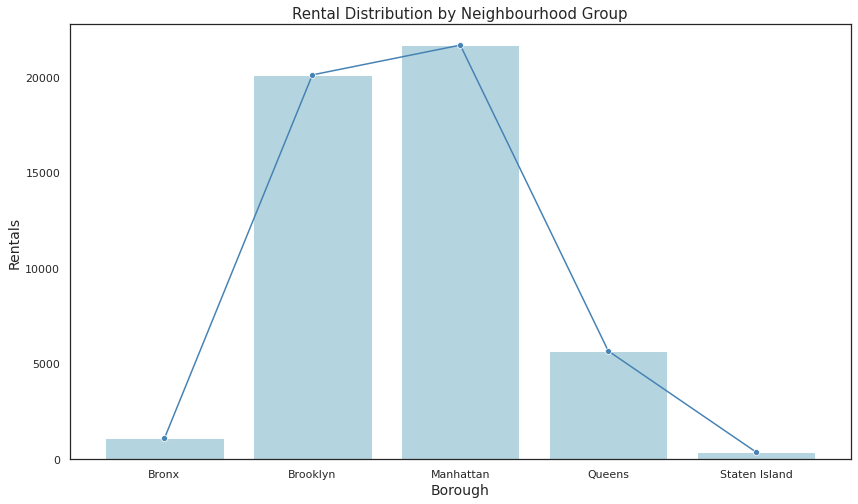

In [ ]:
# Plotting each neighbourhood group with a bar and a line chart
neighbourhood = airbnb.groupby('neighbourhood_group')['neighbourhood'].count().reset_index()
fig,ax = plt.subplots()
sns.barplot(x=neighbourhood[neighbourhood.columns[0]],y=neighbourhood[neighbourhood.columns[1]],color='lightblue',ax=ax)
sns.lineplot(x=neighbourhood[neighbourhood.columns[0]],y=neighbourhood[neighbourhood.columns[1]],color='steelblue',marker='o',ax=ax)
ax.set_xlabel('Borough',fontsize='14')
ax.set_ylabel('Rentals', fontsize='14')
plt.title('Rental Distribution by Neighbourhood Group',fontsize='15')
plt.show()
#Brooklyn and Manhattan boroughs concentrate the majority of the listed rentals on Airbnb

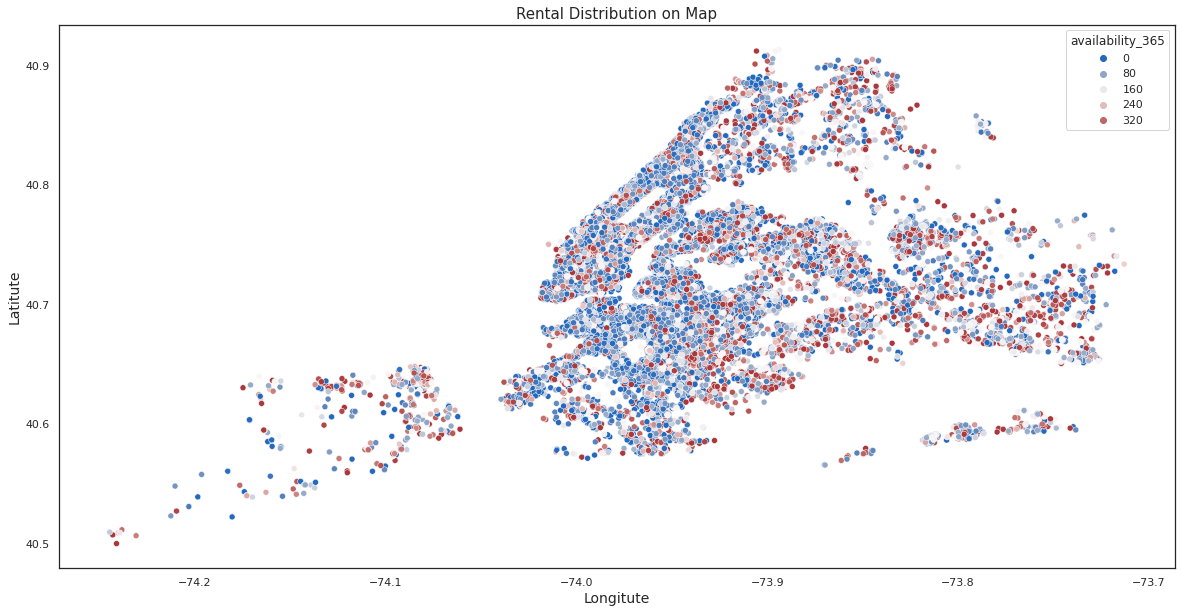

In [ ]:
# Avaliability of rooms of each neibourhood on map
f,ax = plt.subplots(figsize=(20,10))
ax = sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb.availability_365,palette="vlag")
ax.set_xlabel('Longitute',fontsize='14')
ax.set_ylabel('Latitute', fontsize='14')
plt.title('Rental Distribution on Map',fontsize='15')
plt.show()
#The given plot we can visualize the number of rooms available in different neighborhood groups. 

### Rent Prices - AL

In [ ]:
airbnb=pd.read_csv('AB_NYC_2019.csv')

airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64


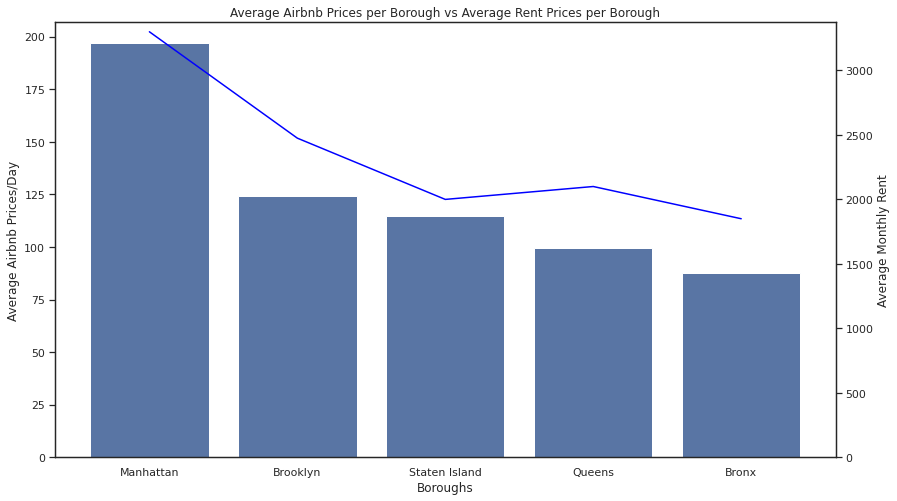

In [ ]:
borough_avg_price= airbnb.groupby('neighbourhood_group')["price"].mean().sort_values(ascending=False)
print(borough_avg_price)
colors = ['b']
ax = sns.barplot(x= borough_avg_price.index,y= borough_avg_price, palette=colors)
ax.set_title('Average Airbnb Prices per Borough vs Average Rent Prices per Borough')
ax.set_ylabel('Average Airbnb Prices/Day', fontsize=12)
ax.set_xlabel('Boroughs', fontsize=12)
ax=ax.twinx()
ax.set_ylabel('Average Monthly Rent')
sns.lineplot(x=['Manhattan','Brooklyn','Staten Island','Queens','Bronx'],y=[3300,2475,2000,2100,1850],color="blue")
ax.set_ylim(ymin=0)
ax.grid(False)
#Rent data from: https://unboxed-analytics.com/data-technology/the-hunt-for-housing-in-nyc-a-data-driven-approach/

   neighbourhood_group        room_type       price
0                Bronx  Entire home/apt  127.506596
1                Bronx     Private room   66.788344
2                Bronx      Shared room   59.800000
3             Brooklyn  Entire home/apt  178.327545
4             Brooklyn     Private room   76.500099
5             Brooklyn      Shared room   50.527845
6            Manhattan  Entire home/apt  249.239109
7            Manhattan     Private room  116.776622
8            Manhattan      Shared room   88.977083
9               Queens  Entire home/apt  147.050573
10              Queens     Private room   71.762456
11              Queens      Shared room   69.020202
12       Staten Island  Entire home/apt  173.846591
13       Staten Island     Private room   62.292553
14       Staten Island      Shared room   57.444444


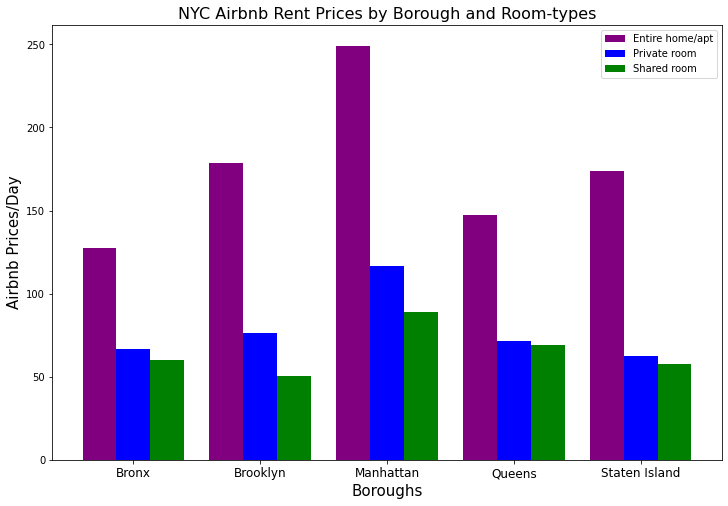

In [ ]:
room_price = airbnb.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
print(room_price)
locations = room_price.neighbourhood_group.unique()
y1 = room_price[room_price['room_type'] == 'Entire home/apt']['price'].values
y2 = room_price[room_price['room_type'] == 'Private room']['price'].values
y3 = room_price[room_price['room_type'] == 'Shared room']['price'].values
fig3,ax2 = plt.subplots(figsize=(12,8))
x1 = [0.2, 3.2, 6.2, 9.2, 12.2]
x2 = [1, 4, 7, 10, 13]
x3 = [1.8, 4.8, 7.8, 10.8, 13.8]
plt.bar(x1, y1, color='purple')
plt.bar(x2, y2, color='b')
plt.bar(x3, y3, color='g')
ax2.set_xticks(range(1,16,3))
ax2.set_xticklabels(locations, fontsize='12')
plt.xlabel('Boroughs',fontsize='15')
plt.ylabel('Airbnb Prices/Day', fontsize='15')
plt.legend(labels=room_price.room_type.unique())
plt.title('NYC Airbnb Rent Prices by Borough and Room-types',fontsize='16')
plt.show()

In this visual, you could see that a large concentration of higher priced Airbnb rooms are in tourist areas such as Midtown, Lower Manhattan and Downtown Brooklyn. Residential areas are much more cheaper and we can see how popular an area is.

<Figure size 1152x864 with 0 Axes>

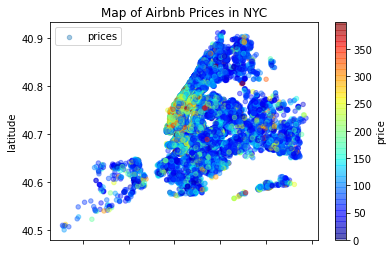

In [ ]:
plt.figure(figsize=(16,12))
ax=airbnb[airbnb.price<400].plot(kind='scatter', x='longitude',y='latitude',label='prices',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
plt.title("Map of Airbnb Prices in NYC")
ax.legend()
plt.ioff()
plt.show()

### Crime Data - LC

Leandro Coimbra PRESENTATION
NEW YORK – AIRBNB CRIME



New York City is one of the busiest cities for Airbnb, with over 50,000 listings. Because it’s such a large city with a wide variety of listings, so far we’ve seen the prices and best locations, it’s important to also understand what are the safest locations for Airbnb in NYC. 

I’ve done analysis of the crime data and came up with the following suggestions:

References:

#https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Current-Year-To-Date-/5uac-w243
  
#https://seaborn.pydata.org/tutorial/color_palettes.html

In [ ]:
#LC - 1	I’ve imported Pandas, Matplotlib, Seaborn, Numpy libraries.
#LC - 2	I’ve important the CSV from NYPD current complaint data. (year to date)
#Leandro Coimbra - Neighborhood Crime 

df = pd.read_csv('NYPD_Complaint_Data_Current__Year_To_Date_.csv')

df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,JURISDICTION_CODE,JURIS_DESC,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PARKS_NM,PATROL_BORO,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,STATION_NAME,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,903695881,69,NaN,12/17/2021,22:13:00,NaN,NaN,COMPLETED,NaN,NaN,NaN,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,NaN,NaN,NaN,12/17/2021,NaN,25-44,BLACK,M,NaN,25-44,BLACK,M,1011203,174515,40.645647,-73.902876,"(40.64564719600002, -73.90287588699994)",POINT (-73.90287588699994 40.64564719600002)
1,400462399,113,NaN,12/17/2021,06:21:00,NaN,NaN,COMPLETED,NaN,NaN,NaN,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,NaN,NaN,NaN,12/17/2021,NaN,NaN,NaN,NaN,NaN,25-44,BLACK,F,1043252,187998,40.682499,-73.787269,"(40.682499421000045, -73.78726915499993)",POINT (-73.78726915499993 40.682499421000045)
2,587910690,113,NaN,12/13/2021,20:05:00,NaN,NaN,COMPLETED,NaN,NaN,NaN,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,NaN,NaN,NaN,12/13/2021,NaN,NaN,NaN,NaN,NaN,25-44,BLACK,M,1042087,190443,40.689218,-73.791449,"(40.689218058000044, -73.79144856999993)",POINT (-73.79144856999993 40.689218058000044)
3,186105368,52,BRONX,12/07/2021,22:49:00,NaN,NaN,COMPLETED,NaN,NaN,0.0,N.Y. POLICE DEPT,118,FELONY,NaN,DANGEROUS WEAPONS,NaN,PATROL BORO BRONX,792.0,WEAPONS POSSESSION 1 & 2,STREET,12/07/2021,NaN,NaN,NaN,NaN,NaN,UNKNOWN,UNKNOWN,E,1017088,260895,40.882718,-73.881247,"(40.88271780700006, -73.88124724999993)",POINT (-73.88124724999993 40.88271780700006)
4,185325394,113,NaN,12/06/2021,17:25:00,NaN,NaN,COMPLETED,NaN,NaN,NaN,N.Y. POLICE DEPT,101,FELONY,INSIDE,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,NaN,NaN,NaN,12/06/2021,NaN,25-44,BLACK,M,NaN,25-44,BLACK,M,1046176,193100,40.696483,-73.776680,"(40.69648322200004, -73.77667979199998)",POINT (-73.77667979199998 40.69648322200004)


In [ ]:
#LC - 3.	The shape of this data set is 36 columns and almost 450,000 rows.
shape=df.shape
print("No. of columns: " + str(shape[1]))
print("No. of rows: " +str(shape[0]))

No. of columns: 36
No. of rows: 449506


In [ ]:
#LC - 4.	These are the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449506 entries, 0 to 449505
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CMPLNT_NUM                449506 non-null  int64  
 1   ADDR_PCT_CD               449506 non-null  int64  
 2   BORO_NM                   448355 non-null  object 
 3   CMPLNT_FR_DT              449506 non-null  object 
 4   CMPLNT_FR_TM              449506 non-null  object 
 5   CMPLNT_TO_DT              409416 non-null  object 
 6   CMPLNT_TO_TM              409568 non-null  object 
 7   CRM_ATPT_CPTD_CD          449345 non-null  object 
 8   HADEVELOPT                1577 non-null    object 
 9   HOUSING_PSA               32583 non-null   float64
 10  JURISDICTION_CODE         449023 non-null  float64
 11  JURIS_DESC                449506 non-null  object 
 12  KY_CD                     449506 non-null  int64  
 13  LAW_CAT_CD                449506 non-null  o

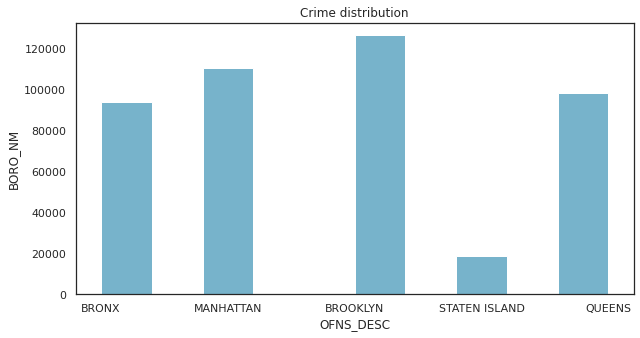

In [ ]:
#LC - 5.	Now for my first graph, I have the crime distribution per borough in New York City
#a.	We can see that Brooklyn has the highest distribution within NYC. 

df['BORO_NM'].hist(grid=False,figsize=[10,5],color='#77b3cb')
plt.title("Crime distribution")
plt.xlabel("OFNS_DESC")
plt.ylabel("BORO_NM")
plt.show()

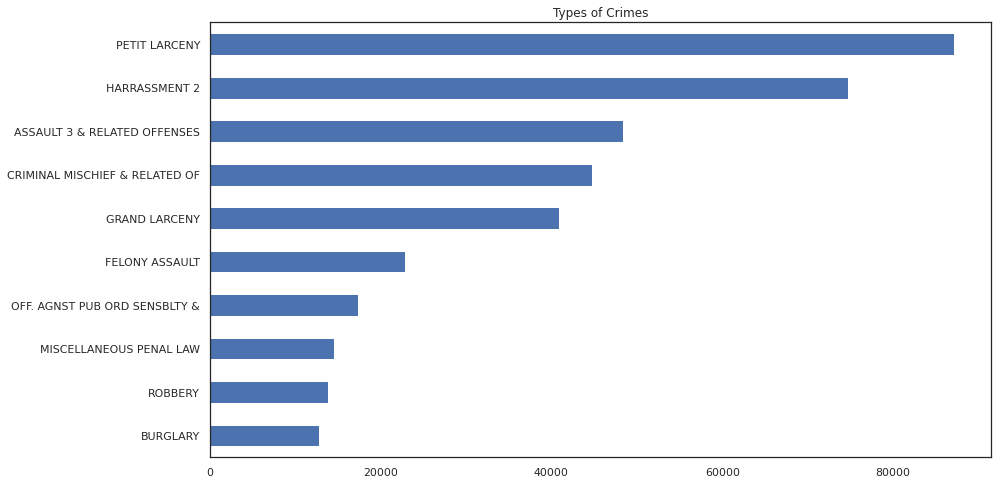

In [ ]:
#LC - 6.	Now I’ve separated the number of incidents by types of crime for Last Year (2021). 
#This shows data for the whole city overall. SO we can see that petit crime is the most committed
df.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes")

              OFNS_DESC                     
VIC_SEX               D      E      F      M
BORO_NM                                     
BRONX             10730   7877  42323  33250
BROOKLYN          16769  10628  53521  45544
MANHATTAN         29482   9871  36298  35004
QUEENS            14259   6831  39226  37842
STATEN ISLAND      1839   2275   8741   6045


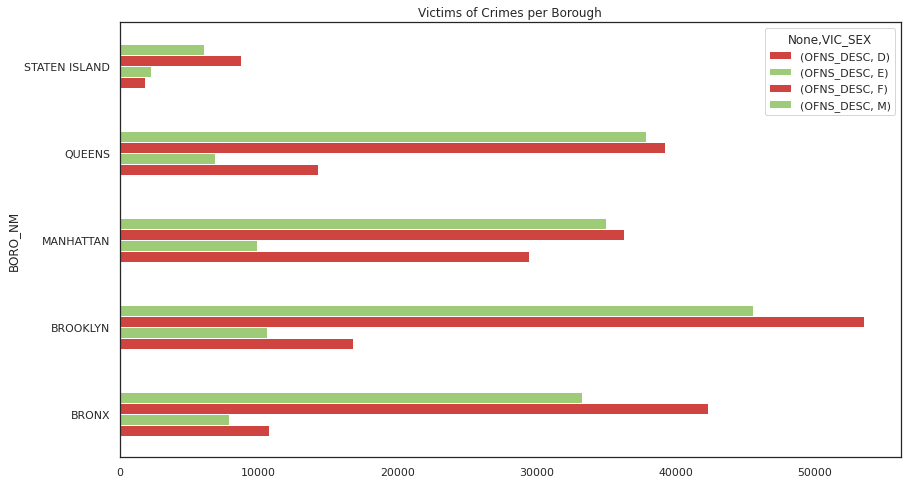

In [ ]:
#LC - 7.	After, I’ve put together a pivot table showing the types of crime per borough according to the victim’s gender. 
#a.	F is crime committed against female victims
#b.	M is crime committed against male
#c.	D is against Business
#d.	E is a victimless crime. 

crime_type=pd.pivot_table(df[['OFNS_DESC','BORO_NM','VIC_SEX']],index=['BORO_NM'],columns='VIC_SEX',aggfunc=len)
print(crime_type)
crime_type.plot(kind='barh',color=('#cf4440','#9ecb77'),title = "Victims of Crimes per Borough")
#D=Business/Organization, 
#E=PSNY/People of the State of New York, 
#F=Female, 
#M=Male

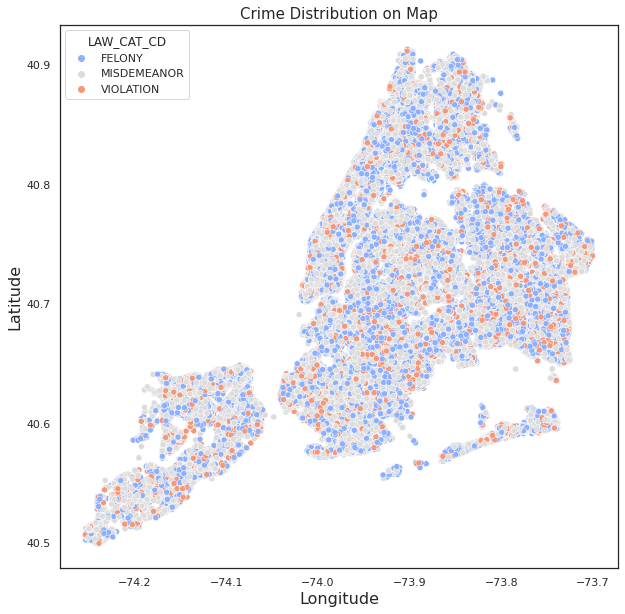

In [ ]:
#LC - 8.	Then, I made a heated map using longitude and latitude of the crime distribution in NYC. 
#9.	Looking at the map, we can see the Bronx has the most felonies, while Brooklyn has the most misdemeanors. 

# I will now pass it to my teammate Michelle Chen

f,ax = plt.subplots(figsize=(10,10))
ax = sns.scatterplot(x=df.Longitude,y=df.Latitude,hue=df.LAW_CAT_CD,palette="coolwarm")
ax.set_xlabel('Longitude',fontsize='16')
ax.set_ylabel('Latitude', fontsize='16')
plt.title('Crime Distribution on Map',fontsize='15')
plt.show()

###Review Influence on Listings
Please click the link below to access an analysis of how reviews influence listings.
https://public.tableau.com/shared/SC85QF2M8?:display_count=n&:origin=viz_share_link
